# Business Understanding

"Notebook clearly explains the value for a specific stakeholder, including:
- Introduction explains the real-world problem the project aims to solve:::::

- -----This project aims to determine which planes would be best to look into first for indoor skydiving companies that plan to expand to offer real skydiving. We'll use an Aviation Accident Dataset to determine which planes would be the lowest risk for the company to start with for their expansion.
        ---Danny Dives was originally an indoor sky-diving facility in Salt Lake City, Utah. It has become so popular, that it is expanding to offer real skydiving experiences. Danny Dives is interested in purchasing and operating airplanes, but do not yet know anything about the potential risks of aircraft.

  ---You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.
  
- Introduction identifies stakeholders who could use the project and how they would use it
- Conclusion summarizes implications of the project for the real-world problem and stakeholders "

# Data Understanding

"Notebook clearly describes the data, including:
- Describe the data sources and explain why the data are suitable for the project
- Present the size of the dataset and descriptive statistics for all features used in the analysis
- Justify the inclusion of features based on their properties and relevance for the project
- Identify any limitations of the data that have implications for the project"


The data source used in this project is a data set from the National Transportation Safety Board with specifics about accidents in aviation from 1962 to 2023 in the US, in its territories and possessions, and in international waters.
This project looks at determining recommendations based on safety, and this data set is a good option to use for this project as it contains many factual details of specific accidents in past flight accidents. 

The Aviation Dataset contains 90348 records of individual aviation accidents. There are 31 columns that break down each accident further; "Purpose.of.flight", "Total.Fatal.Injuries", and "Weather.Condition" are some examples.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-1-project-v3/refs/heads/master/data/Aviation_Data.csv')
data.head()

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [29]:
data.shape

(90348, 31)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [31]:
data["Purpose.of.flight"].value_counts()

Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

## Data Preparation

"Notebook shows how and why you prepared your data, including:
- Instructions or code needed to get and prepare the raw data for analysis
- Code comments and text to explain what your data preparation code does
- Valid justifications for why the steps you took are appropriate for the problem you are solving"

In [32]:
# Start cleaning dataset. First, drop entries where the flight purpose is not skydiving.
skydiving = data[data['Purpose.of.flight'] == 'Skydiving']
skydiving.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
2099,20020917X02847,Accident,ATL82FA212,1982-07-25,"LOUISBURG, NC",United States,NaN,NaN,LFN,FRANKLIN COUNTY,...,Skydiving,NaN,4.0,1.0,NaN,NaN,VMC,Takeoff,Probable Cause,17-10-2016
3066,20020917X04782,Accident,LAX83FA012,1982-10-17,"TAFT, CA",United States,NaN,NaN,NaN,PRIVATE AIRPORT,...,Skydiving,NaN,14.0,NaN,NaN,NaN,VMC,Takeoff,Probable Cause,17-10-2016
4285,20001214X42672,Accident,FTW83LA177,1983-04-02,"MCKINNEY, TX",United States,NaN,NaN,TX05,AERO COUNTRY,...,Skydiving,NaN,1.0,NaN,NaN,4.0,VMC,Standing,Probable Cause,17-10-2016
5960,20001214X44100,Accident,DCA83AA036,1983-08-21,"SILVANA, WA",United States,NaN,NaN,S88,NaN,...,Skydiving,NaN,11.0,2.0,NaN,13.0,VMC,Other,Probable Cause,17-10-2016
10605,20001214X41706,Accident,ATL85FA072,1984-12-30,"DUBLIN, VA",United States,NaN,NaN,PSK,NEW RIVER VALLEY,...,Skydiving,NaN,1.0,NaN,NaN,NaN,VMC,Maneuvering,Probable Cause,17-10-2016


In [33]:
#reset the index
skydiving.reset_index(drop= True, inplace=True)

In [34]:
skydiving.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20020917X02847,Accident,ATL82FA212,1982-07-25,"LOUISBURG, NC",United States,NaN,NaN,LFN,FRANKLIN COUNTY,...,Skydiving,NaN,4.0,1.0,NaN,NaN,VMC,Takeoff,Probable Cause,17-10-2016
1,20020917X04782,Accident,LAX83FA012,1982-10-17,"TAFT, CA",United States,NaN,NaN,NaN,PRIVATE AIRPORT,...,Skydiving,NaN,14.0,NaN,NaN,NaN,VMC,Takeoff,Probable Cause,17-10-2016
2,20001214X42672,Accident,FTW83LA177,1983-04-02,"MCKINNEY, TX",United States,NaN,NaN,TX05,AERO COUNTRY,...,Skydiving,NaN,1.0,NaN,NaN,4.0,VMC,Standing,Probable Cause,17-10-2016
3,20001214X44100,Accident,DCA83AA036,1983-08-21,"SILVANA, WA",United States,NaN,NaN,S88,NaN,...,Skydiving,NaN,11.0,2.0,NaN,13.0,VMC,Other,Probable Cause,17-10-2016
4,20001214X41706,Accident,ATL85FA072,1984-12-30,"DUBLIN, VA",United States,NaN,NaN,PSK,NEW RIVER VALLEY,...,Skydiving,NaN,1.0,NaN,NaN,NaN,VMC,Maneuvering,Probable Cause,17-10-2016


In [35]:
# Deal with missing data. Start by dropping columns that aren't needed. We want to keep columns about injuries, event date, location, damage, and aircraft make and model. 
# "Schedule" column only has 2 non-null values, so we'll drop it.
# We'll drop "Investigation.Type" as it contains values "accident" and "incident". We will treat the df with perspective that every entry is an accident.
skydiving = skydiving.drop(['Event.Id', 'Purpose.of.flight', 'FAR.Description','Publication.Date', 'Aircraft.Category', 'Amateur.Built', 'Registration.Number', 'Accident.Number', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Air.carrier', 'Schedule', 'Investigation.Type', ], axis = 1)

skydiving.head()

,Event.Date,Location,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,1982-07-25,"LOUISBURG, NC",Fatal(4),Destroyed,Cessna,182A,1.0,Reciprocating,4.0,1.0,NaN,NaN,VMC,Takeoff,Probable Cause
1,1982-10-17,"TAFT, CA",Fatal(14),Destroyed,Beech,C-45H,2.0,Reciprocating,14.0,NaN,NaN,NaN,VMC,Takeoff,Probable Cause
2,1983-04-02,"MCKINNEY, TX",Fatal(1),NaN,De Havilland,DHC-6,2.0,Turbo Prop,1.0,NaN,NaN,4.0,VMC,Standing,Probable Cause
3,1983-08-21,"SILVANA, WA",Fatal(11),Destroyed,Lockheed,"LEARSTAR, L-18-56",2.0,Reciprocating,11.0,2.0,NaN,13.0,VMC,Other,Probable Cause
4,1984-12-30,"DUBLIN, VA",Fatal(1),Destroyed,Cessna,182A,1.0,Reciprocating,1.0,NaN,NaN,NaN,VMC,Maneuvering,Probable Cause


In [36]:
skydiving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              182 non-null    object 
 1   Location                182 non-null    object 
 2   Injury.Severity         182 non-null    object 
 3   Aircraft.damage         178 non-null    object 
 4   Make                    182 non-null    object 
 5   Model                   182 non-null    object 
 6   Number.of.Engines       177 non-null    float64
 7   Engine.Type             171 non-null    object 
 8   Total.Fatal.Injuries    152 non-null    float64
 9   Total.Serious.Injuries  131 non-null    float64
 10  Total.Minor.Injuries    125 non-null    float64
 11  Total.Uninjured         144 non-null    float64
 12  Weather.Condition       176 non-null    object 
 13  Broad.phase.of.flight   70 non-null     object 
 14  Report.Status           169 non-null    ob

In [37]:
skydiving['Aircraft.damage'].value_counts()

Substantial    131
Destroyed       38
Minor            9
Name: Aircraft.damage, dtype: int64

In [38]:
skydiving['Total.Fatal.Injuries'].value_counts()

0.0     93
1.0     28
5.0      7
6.0      4
2.0      4
4.0      4
12.0     2
7.0      2
3.0      2
11.0     2
10.0     1
16.0     1
17.0     1
14.0     1
Name: Total.Fatal.Injuries, dtype: int64

In [39]:
skydiving['Total.Serious.Injuries'].value_counts()

0.0    85
1.0    28
2.0     8
4.0     5
5.0     2
3.0     1
7.0     1
6.0     1
Name: Total.Serious.Injuries, dtype: int64

In [40]:
skydiving['Total.Minor.Injuries'].value_counts()

0.0     95
1.0     20
2.0      7
4.0      1
6.0      1
13.0     1
Name: Total.Minor.Injuries, dtype: int64

In [41]:
skydiving['Total.Uninjured'].value_counts()

1.0     52
0.0     23
4.0     14
5.0     11
7.0      6
3.0      6
2.0      6
6.0      5
12.0     4
15.0     4
10.0     4
17.0     3
13.0     2
14.0     1
22.0     1
11.0     1
18.0     1
Name: Total.Uninjured, dtype: int64

In [42]:
skydiving['Weather.Condition'].value_counts()

VMC    174
IMC      2
Name: Weather.Condition, dtype: int64

In [43]:
# We see that 174 entries have VMC (Visual Meteorological Conditions) and 2 entries have IMC (Instrument Meteorological Conditions).
# (As we have 182 entries, we know that there are 6 missing values in this column.)
# VMC is associated with clear weather and IMC is associated with cloudy or bad weather.
# As more than 95% have VMC-clear weather, we'll drop this column as well.

In [44]:
skydiving = skydiving.drop("Weather.Condition", axis =1)

In [45]:
skydiving['Make'].value_counts()

CESSNA                        76
Cessna                        59
Beech                         13
De Havilland                  10
BEECH                          7
DEHAVILLAND                    5
PACIFIC AEROSPACE CORP LTD     3
Lockheed                       2
Pilatus                        2
de Havilland                   1
Helio                          1
FIREFLY BALLOONS INC           1
BOEING                         1
C A S A                        1
Name: Make, dtype: int64

In [46]:
skydiving['Make'] = skydiving['Make'].str.title()

In [47]:
skydiving['Make'].value_counts()

Cessna                        135
Beech                          20
De Havilland                   11
Dehavilland                     5
Pacific Aerospace Corp Ltd      3
Lockheed                        2
Pilatus                         2
Helio                           1
Boeing                          1
Firefly Balloons Inc            1
C A S A                         1
Name: Make, dtype: int64

In [48]:
skydiving['Make'] = skydiving['Make'].replace('Dehavilland', 'De Havilland')

In [49]:
skydiving['Make'].value_counts()

Cessna                        135
Beech                          20
De Havilland                   16
Pacific Aerospace Corp Ltd      3
Lockheed                        2
Pilatus                         2
Helio                           1
Boeing                          1
Firefly Balloons Inc            1
C A S A                         1
Name: Make, dtype: int64

In [50]:
skydiving['Model'].value_counts()

182                  30
182A                 29
208                  11
182C                  6
208B                  6
                     ..
L-402-2 (LASA-60)     1
P206A                 1
K172R                 1
E 90                  1
A75N1 (PT17)          1
Name: Model, Length: 70, dtype: int64

In [51]:
skydiving['Injury.Severity'].value_counts()

Non-Fatal    120
Fatal(1)      18
Fatal         17
Fatal(5)       6
Fatal(6)       4
Fatal(4)       3
Fatal(7)       2
Fatal(2)       2
Fatal(12)      2
Fatal(11)      1
Fatal(3)       1
Fatal(10)      1
Fatal(16)      1
Minor          1
Fatal(14)      1
Serious        1
Fatal(17)      1
Name: Injury.Severity, dtype: int64

In [52]:
skydiving['Total.Fatal.Injuries'].value_counts()

0.0     93
1.0     28
5.0      7
6.0      4
2.0      4
4.0      4
12.0     2
7.0      2
3.0      2
11.0     2
10.0     1
16.0     1
17.0     1
14.0     1
Name: Total.Fatal.Injuries, dtype: int64

In [53]:
#Why does Injury.Severity Column -Fatal() not match the Total.Fatal.Injuries Column-> Total.Fatal.Injuries Column missing values

In [58]:
grouped = skydiving.groupby(['Make', 'Injury.Severity']).size().reset_index(name='Count')

print(grouped)

                          Make Injury.Severity  Count
0                        Beech           Fatal      5
1                        Beech        Fatal(1)      3
2                        Beech       Fatal(10)      1
3                        Beech       Fatal(12)      2
4                        Beech       Fatal(14)      1
5                        Beech        Fatal(7)      1
6                        Beech       Non-Fatal      7
7                       Boeing       Non-Fatal      1
8                      C A S A           Fatal      1
9                       Cessna           Fatal      9
10                      Cessna        Fatal(1)      8
11                      Cessna       Fatal(17)      1
12                      Cessna        Fatal(2)      2
13                      Cessna        Fatal(4)      3
14                      Cessna        Fatal(5)      6
15                      Cessna        Fatal(6)      3
16                      Cessna        Fatal(7)      1
17                      Cess

In [59]:
grouped2 = skydiving.groupby(['Make', 'Aircraft.damage']).size().reset_index(name='Count')

print(grouped2)

                          Make Aircraft.damage  Count
0                        Beech       Destroyed      8
1                        Beech           Minor      2
2                        Beech     Substantial     10
3                       Boeing     Substantial      1
4                      C A S A     Substantial      1
5                       Cessna       Destroyed     26
6                       Cessna           Minor      4
7                       Cessna     Substantial    105
8                 De Havilland       Destroyed      1
9                 De Havilland           Minor      3
10                De Havilland     Substantial      8
11        Firefly Balloons Inc     Substantial      1
12                       Helio       Destroyed      1
13                    Lockheed       Destroyed      2
14  Pacific Aerospace Corp Ltd     Substantial      3
15                     Pilatus     Substantial      2


In [61]:
skydiving['Fatality'] = skydiving['Injury.Severity'].apply(lambda x: 'Fatal' if 'fatal' in x.lower() else 'Non-Fatal')
skydiving.head()

,Event.Date,Location,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Broad.phase.of.flight,Report.Status,Fatality
0,1982-07-25,"LOUISBURG, NC",Fatal(4),Destroyed,Cessna,182A,1.0,Reciprocating,4.0,1.0,NaN,NaN,Takeoff,Probable Cause,Fatal
1,1982-10-17,"TAFT, CA",Fatal(14),Destroyed,Beech,C-45H,2.0,Reciprocating,14.0,NaN,NaN,NaN,Takeoff,Probable Cause,Fatal
2,1983-04-02,"MCKINNEY, TX",Fatal(1),NaN,De Havilland,DHC-6,2.0,Turbo Prop,1.0,NaN,NaN,4.0,Standing,Probable Cause,Fatal
3,1983-08-21,"SILVANA, WA",Fatal(11),Destroyed,Lockheed,"LEARSTAR, L-18-56",2.0,Reciprocating,11.0,2.0,NaN,13.0,Other,Probable Cause,Fatal
4,1984-12-30,"DUBLIN, VA",Fatal(1),Destroyed,Cessna,182A,1.0,Reciprocating,1.0,NaN,NaN,NaN,Maneuvering,Probable Cause,Fatal


In [63]:
grouped4 = skydiving.groupby(['Make', 'Fatality']).size().reset_index(name='Count')

print(grouped4)

                          Make   Fatality  Count
0                        Beech      Fatal     20
1                       Boeing      Fatal      1
2                      C A S A      Fatal      1
3                       Cessna      Fatal    133
4                       Cessna  Non-Fatal      2
5                 De Havilland      Fatal     16
6         Firefly Balloons Inc      Fatal      1
7                        Helio      Fatal      1
8                     Lockheed      Fatal      2
9   Pacific Aerospace Corp Ltd      Fatal      3
10                     Pilatus      Fatal      2


In [199]:
skydiving['Number.of.Engines'].value_counts()

1.0    132
2.0     34
0.0      1
Name: Number.of.Engines, dtype: int64

In [212]:
skydiving.isna().sum()

Event.Date                 0
Location                   0
Injury.Severity            0
Aircraft.damage            4
Make                       0
Model                      0
Number.of.Engines          2
Engine.Type                3
Total.Fatal.Injuries      30
Total.Serious.Injuries    51
Total.Minor.Injuries      57
Total.Uninjured           38
Weather.Condition          1
Report.Status              0
dtype: int64

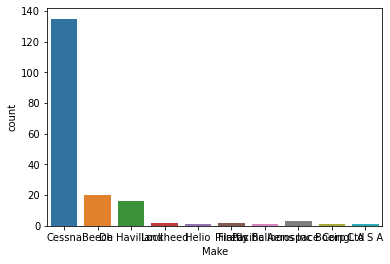

In [64]:
sns.countplot(x='Make', data=skydiving)
plt.show()

# Exploratory Data Analysis

"Notebook promotes three recommendations for choosing films to produce:
 - Uses three or more findings from data analyses to support recommendations
 - Explains why the findings support the recommendations
 - Explains how the recommendations would help the stakeholder


"Notebook includes three relevant and polished visualizations of findings that:
 - Help the project stakeholder understand the value or success of the project
 - Have text and marks to aid reader interpretation, such as graph and axis titles, axis ticks and labels, or legend (varies by visualization type)
 - Use color, size, and/or location to appropriately facilitate comparisons
 - Are not cluttered, dense, or illegible
"

In [65]:
#accident survivability?, accident cause, most common planes that have reported accidents


# Conclusions

## Limitations

The largest limitation of this data set is that we only have the data for accidents. We don't have the data for when flights occurred where everything went smoothly. This means we cannot say anything like: "99% of flights of a certain kind of plane has safe flights." This also makes it difficult to see the whole picture.

## Recommendations

These planes are commonly used.
Of the commonly used, these have the least reported accidents.
Of all of the reported accidents with most commonly used planes, these are the main reason for the accident.

## Next Steps

Look into price for these planes.